In [318]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import os
import glob
from pathlib import Path
import seaborn as sns

# Predicting stock market by industries

## Healthcare industry analysis - 44 stocks

In [319]:
path='Quantiacs_Data/Stock_Data/Health_Care_Stocks_data/'
data_df_dict={}
for filename in glob.glob(os.path.join(path,'*.txt')):
    # Reading data
    data=pd.read_csv(filename,sep="\s*,\s*",index_col='DATE',engine='python')
    
    # Reading ticker from file name
    ticker=Path(filename).stem
    
    # Converting dates to datetime index
    data.index=pd.to_datetime(data.index,format='%Y%m%d')
    
    # Storing time series in the dict for ticerks
    data_df_dict[ticker]=data['CLOSE']

# Converting dict to a dataframe
data_df=pd.DataFrame(data_df_dict)

# Getting rid of columns which are Null all the way 
for i in data_df.columns:
    if len(data_df[i].dropna())==0:
        del data_df[i]
    else:
        continue
        
print(data_df.head(5))        
data_df.to_csv('check.csv')

            ABBV    ABC    ABT    AET  AGN     ALXN     AMGN    BAX    BDX  \
DATE                                                                         
2001-01-02   NaN  12.45  24.06  10.12  NaN  15.3906  62.8750  24.06  34.19   
2001-01-03   NaN  12.70  23.53  10.35  NaN  17.0313  67.0000  23.19  33.06   
2001-01-04   NaN  11.65  21.38   9.76  NaN  14.9063  62.6875  21.88  31.81   
2001-01-05   NaN  11.25  21.50   9.56  NaN  12.6875  58.3750  22.28  31.38   
2001-01-08   NaN  11.94  21.28   9.48  NaN  10.9219  58.6875  22.82  31.56   

              BMY  ...    SYK     THC    TMO    UHS    UNH    VAR     VRTX  \
DATE               ...                                                       
2001-01-02  71.50  ...  24.38  116.00  29.00  25.17  14.73  13.62  63.1250   
2001-01-03  66.81  ...  24.63  110.50  28.69  25.34  14.30  13.58  62.6250   
2001-01-04  63.06  ...  23.20  104.17  29.03  22.19  13.30  12.95  59.8750   
2001-01-05  64.44  ...  22.84  110.17  27.64  21.94  13.48  13.

### Plotting stock prices after 2014

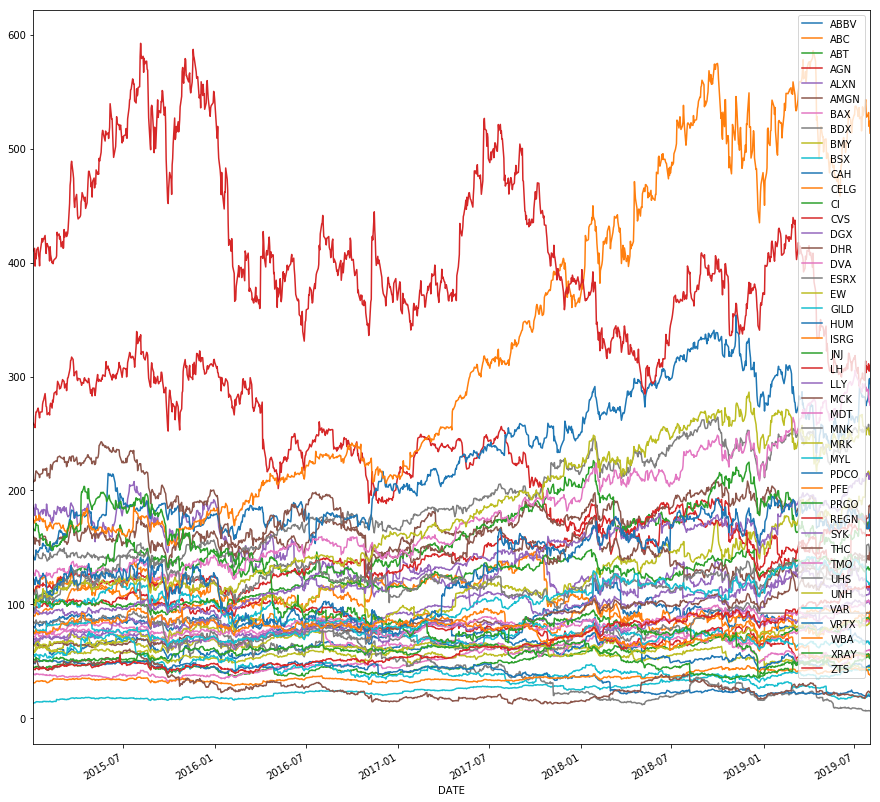

In [320]:
# this company went bankrupt after specefic amount of time
del data_df['AET']

# estimating data after 2014
data_df_temp=data_df[data_df.index.year>2014]
data_df_temp.plot(figsize=(15,15))
plt.show()

### Plotting returns

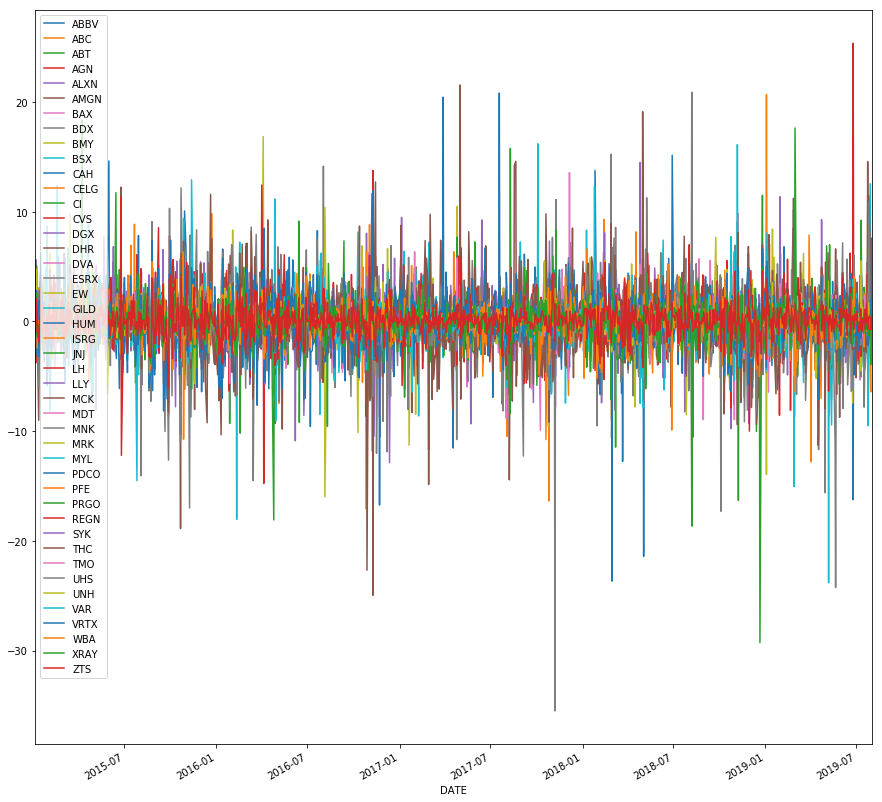

In [321]:
# Taking returns of the stoc prices
returns=data_df_temp.pct_change(1).dropna()*100
returns.plot(figsize=(15,15))

### Correlation matrix - Zoom into it

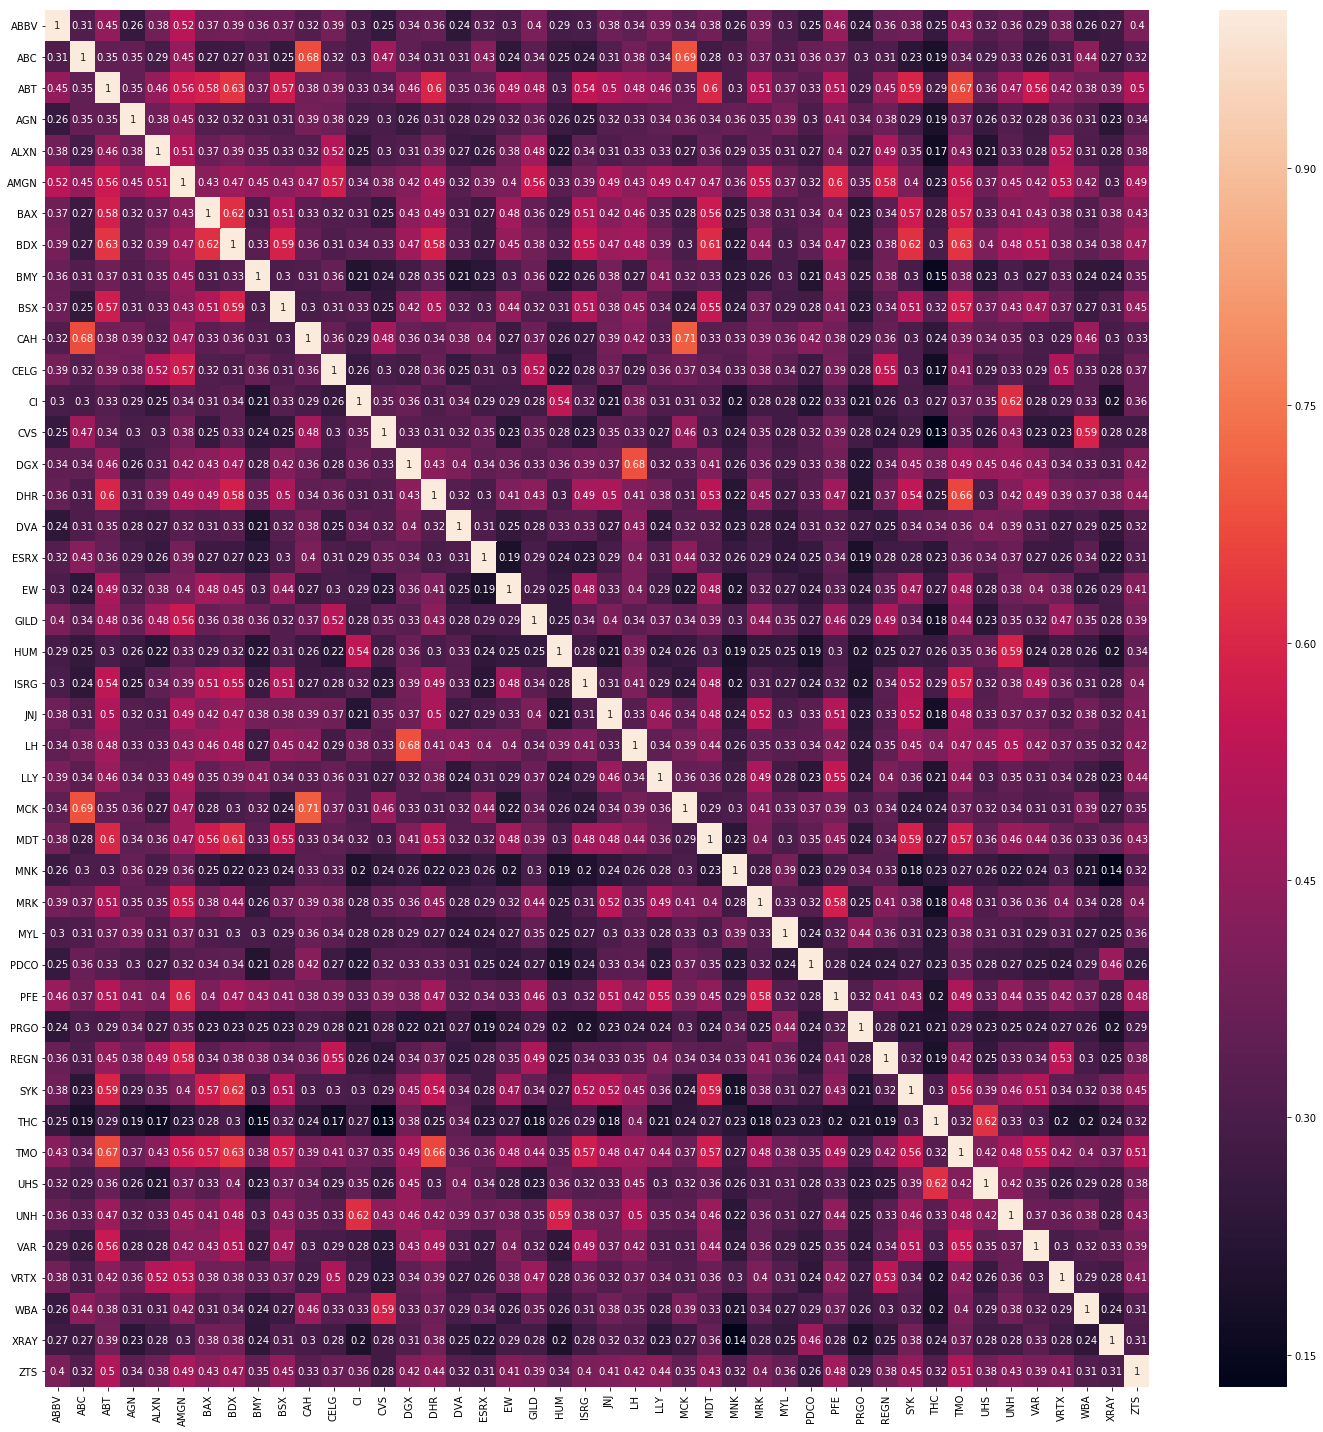

In [322]:
fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(returns.corr(), annot=True)
plt.yticks(rotation=0)  # ensure y-axis ticklabels are horizontal
plt.xticks(rotation=90)  # ensure x-axis ticklabels are vertical
plt.tight_layout()
plt.show()

In [323]:
# Get all the columns 
names=list(returns)

#Get the target names and target df
target_names=names[0]
target_df=returns[target_names]

# Get the features names and df
feature_names=names.copy()
feature_names.remove(target)
features_df=returns[feature_names]

# Set train_size here
train_size=int(0.85*features_df.shape[0])

train_features=features_df[:train_size]
train_targets=target_df[:train_size]
test_features=features_df[train_size:]
test_targets=target_df[train_size:]

### Random Forest and tuning hyperparameters for random forest

#### The below computation will take a lot of time to run

In [148]:
'''
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import ParameterGrid


rfr=RandomForestRegressor(n_estimators=200)
rfr.fit(train_features, train_targets)

grid={'n_estimators':[600,800,1000,1500],'max_depth':[3,6,8,12,15],'max_features':[10,20,25,30,40],'random_state':[42]}
test_score=[]

for g in ParameterGrid(grid):
    rfr.set_params(**g)
    rfr.fit(train_features, train_targets)
    test_score.append(rfr.score(test_features, test_targets))
    
best_idx=np.argmax(test_score)    
print(test_score[best_idx],ParameterGrid(grid)[best_idx])
'''

0.1993730049209298 {'random_state': 42, 'n_estimators': 1000, 'max_features': 40, 'max_depth': 3}


After running the computation the best estimators are given below. Increasing the max_depth will overfit the data - 3 is the best estimator for max_depth. Increasing the max_features will be very good for regression problems however if it's classification problem use Sqrt(n_features). N_estimator higher the better.

In [163]:
for i in range(0,len(test_score)):
    print(test_score[i],ParameterGrid(grid)[i])

0.18651600953532188 {'random_state': 42, 'n_estimators': 600, 'max_features': 10, 'max_depth': 3}
0.18606066131056687 {'random_state': 42, 'n_estimators': 800, 'max_features': 10, 'max_depth': 3}
0.18583157283518392 {'random_state': 42, 'n_estimators': 1000, 'max_features': 10, 'max_depth': 3}
0.18506612792450783 {'random_state': 42, 'n_estimators': 1500, 'max_features': 10, 'max_depth': 3}
0.1907805529511354 {'random_state': 42, 'n_estimators': 600, 'max_features': 20, 'max_depth': 3}
0.18965544875697626 {'random_state': 42, 'n_estimators': 800, 'max_features': 20, 'max_depth': 3}
0.1922830773321339 {'random_state': 42, 'n_estimators': 1000, 'max_features': 20, 'max_depth': 3}
0.1920967811867491 {'random_state': 42, 'n_estimators': 1500, 'max_features': 20, 'max_depth': 3}
0.1937099546457679 {'random_state': 42, 'n_estimators': 600, 'max_features': 25, 'max_depth': 3}
0.19427743293169986 {'random_state': 42, 'n_estimators': 800, 'max_features': 25, 'max_depth': 3}
0.19632007737923907 

### Scailng the data - Scaling the data makes our prediction better ?

In [324]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

returns_scaled=scaler.fit_transform(returns)

returns_scaled=pd.DataFrame(returns_scaled, index=returns.index, columns=returns.columns)

target_df_scaled=returns_scaled[target_names]
features_df_scaled=returns_scaled[feature_names]

train_features_scaled=features_df_scaled[:train_size]
train_targets_scaled=target_df_scaled[:train_size]
test_features_scaled=features_df_scaled[train_size:]
test_targets_scaled=target_df_scaled[train_size:]

rfr=RandomForestRegressor(n_estimators=1000,max_features=40,max_depth=3,random_state=42)
rfr.fit(train_features_scaled, train_targets_scaled)

# Look at the R^2 scores on train and test
print("Test Score")
print(rfr.score(test_features_scaled, test_targets_scaled))

predictions=rfr.predict(test_features_scaled)

test_features_pca
print('Nope, scaling data makes it worse')

Test Score
0.1958812191332681
Nope, scaling data makes it worse


### Important Features

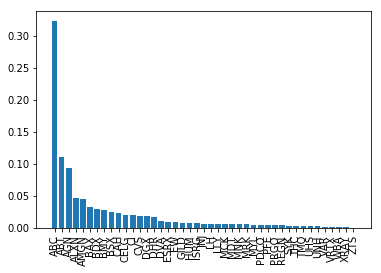

In [325]:
importances=rfr.feature_importances_
sorted_index=np.argsort(importances)[::-1]
x=range(len(importances))

plt.bar(x,importances[sorted_index],tick_label=labels)
plt.xticks(rotation=90)
plt.show()

### Performing PCA

Variance Explained by PCA
[0.36971484 0.05802675 0.04418193 0.0363905  0.02932547]
RFR score by using PCA
0.441676855921389
0.0946289161389837
PCA makes it worse, never use it
Predictions Chart


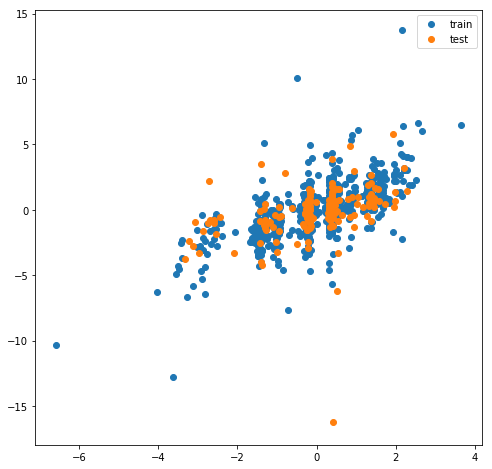

In [326]:
from sklearn.decomposition import PCA

sc = StandardScaler()
train_features_scaled = sc.fit_transform(train_features)
test_features_scaled = sc.transform(test_features)

pca=PCA(n_components=5)
train_features_pca = pca.fit_transform(train_features_scaled)
test_features_pca = pca.transform(test_features_scaled)

print("Variance Explained by PCA")
print(pca.explained_variance_ratio_)

rfr=RandomForestRegressor(n_estimators=1000,max_features=5,max_depth=3,random_state=42)
rfr.fit(train_features_pca, train_targets)

print("RFR score by using PCA")
print(rfr.score(train_features_pca,train_targets))
print(rfr.score(test_features_pca,test_targets))
print("PCA makes it worse, never use it")

print("Predictions Chart")
test_predictions=rfr.predict(train_features_pca)
trains_predictions=rfr.predict(test_features_pca)

fig,ax=plt.subplots(figsize=(8,8))
plt.scatter(test_predictions, train_targets, label='train')
plt.scatter(trains_predictions, test_targets,label='test')  # plot test set
plt.legend(); 
plt.show()


### Performing normal Random forest analysis after making sure Scaling and PCA are of no use in this case

Scaling and PCA makes our predictions worse. Lets try a simple Random Forest again

RFR score by using PCA
0.4972932387673732
0.1993730049209298
Predictions Chart


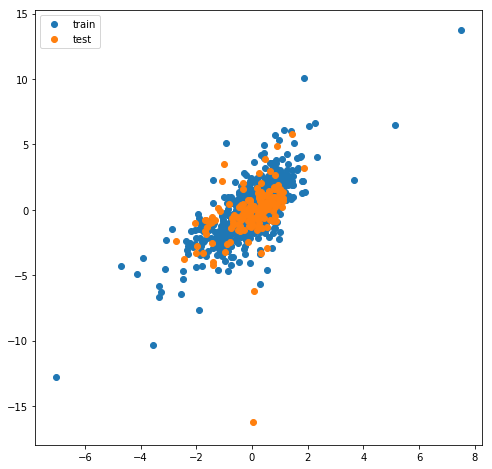

Test set RMSE of gb: 1.836


In [327]:
rfr=RandomForestRegressor(n_estimators=1000,max_features=40,max_depth=3,random_state=42)
rfr.fit(train_features, train_targets)

print("RFR score by using PCA")
print(rfr.score(train_features,train_targets))
print(rfr.score(test_features,test_targets))

print("Predictions Chart")
test_predictions=rfr.predict(train_features)
trains_predictions=rfr.predict(test_features)

fig,ax=plt.subplots(figsize=(8,8))
plt.scatter(test_predictions, train_targets, label='train')
plt.scatter(trains_predictions, test_targets,label='test')  # plot test set
plt.legend(); 
plt.show()


# Compute MSE
mse_test = MSE(test_targets,y_pred)

# Compute RMSE
rmse_test = mse_test ** 0.5

# Print RMSE
print('Test set RMSE of gb: {:.3f}'.format(rmse_test))



### Decision Trees

In [328]:
# Import DecisionTreeRegressor from sklearn.tree
from sklearn.tree import DecisionTreeRegressor

# Import mean_squared_error from sklearn.metrics as MSE
from sklearn.metrics import mean_squared_error as MSE

# Instantiate dt
dt = DecisionTreeRegressor(max_features=40,max_depth=3,min_samples_leaf=0.13,random_state=3)

# Fit dt to the training set
dt.fit(train_features,train_targets)

# Compute y_pred
y_pred = dt.predict(test_features)

# Compute mse_dt
mse_dt = MSE(y_pred, test_targets)

# Compute rmse_dt
rmse_dt = (mse_dt)**0.5

# Print rmse_dt
print("Test set RMSE of dt: {:.2f}".format(rmse_dt))

print(dt.score(test_features,test_targets))

Test set RMSE of dt: 1.84
0.1462652003685162


Random forest is still the best predictor we have

### Adaboost Regressor

In [329]:
from sklearn.ensemble import AdaBoostRegressor

dt = DecisionTreeRegressor(max_features=40,max_depth=3,random_state=3)
ada = AdaBoostRegressor(base_estimator=dt,n_estimators=1000, random_state=1)
ada.fit(train_features,train_targets)

y_predict=ada.predict(test_features)
print(ada.score(test_features,test_targets))

-0.04896265065241745


### Gradient Boosting

In [330]:
from sklearn.ensemble import GradientBoostingRegressor

gbr=GradientBoostingRegressor(max_features=40,max_depth=3, 
            n_estimators=1000,
            random_state=42)
gbr.fit(train_features,train_targets)

y_predict=gbr.predict(test_features)
print(gbr.score(test_features,test_targets))

from sklearn.metrics import mean_squared_error as MSE

# Compute MSE
mse_test = MSE(test_targets,y_pred)

# Compute RMSE
rmse_test = mse_test ** 0.5

# Print RMSE
print('Test set RMSE of gb: {:.3f}'.format(rmse_test))


-0.0005890763525235876
Test set RMSE of gb: 1.836


### KNN Neighbors

In [345]:
from sklearn.neighbors import KNeighborsRegressor

for n in range(2,30):
    knn=KNeighborsRegressor(n_neighbors=n)
    knn.fit(train_features_scaled, train_targets)
    
    print("Neighbors="+str(n))
    print("test train score")
    print(knn.score(train_features_scaled,train_targets))
    print(knn.score(test_features_scaled,test_targets))
    print()

Neighbors=2
test train score
0.7703816715391201
-0.04539807829956688

Neighbors=3
test train score
0.6487596399005559
-0.011706462824409014

Neighbors=4
test train score
0.5830710132931982
0.04548837754515089

Neighbors=5
test train score
0.5298324275514442
0.024635350712041593

Neighbors=6
test train score
0.49803269824190566
0.053146411502411624

Neighbors=7
test train score
0.47433546475150057
0.072360895352515

Neighbors=8
test train score
0.45800377876275944
0.0837146484532002

Neighbors=9
test train score
0.4464511988866999
0.0932050684382697

Neighbors=10
test train score
0.43561541582692365
0.1007216269420147

Neighbors=11
test train score
0.43103087925858063
0.08449334324714242

Neighbors=12
test train score
0.4212881384764851
0.093659582880109

Neighbors=13
test train score
0.41750234274473735
0.1044580297860973

Neighbors=14
test train score
0.40734915924841864
0.1055461102759434

Neighbors=15
test train score
0.4034774389118055
0.10839237234380984

Neighbors=16
test train s

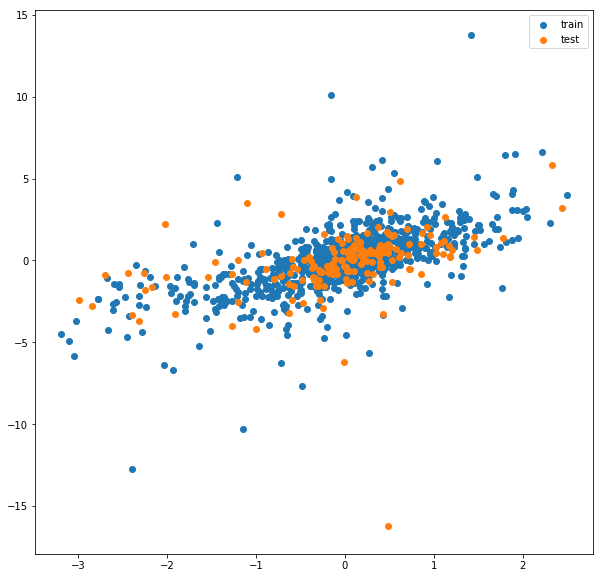

In [340]:
knn=KNeighborsRegressor(28)

knn.fit(train_features_scaled,train_targets)

train_predictions=knn.predict(train_features_scaled)
test_predictions=knn.predict(test_features_scaled)

fig, ax = plt.subplots(figsize=(10,10)) 
plt.scatter(train_predictions,train_targets,label='train')
plt.scatter(test_predictions,test_targets,label='test')
plt.legend()
plt.show()

### Neural Network

Epoch 1/25
980/980 [==============================] - 1s 1ms/step - loss: 2.3939
Epoch 2/25
980/980 [==============================] - 0s 499us/step - loss: 2.0455
Epoch 3/25
980/980 [==============================] - 0s 496us/step - loss: 1.8479
Epoch 4/25
980/980 [==============================] - 0s 499us/step - loss: 1.6106
Epoch 5/25
980/980 [==============================] - 0s 493us/step - loss: 1.5064
Epoch 6/25
980/980 [==============================] - 1s 515us/step - loss: 1.1891
Epoch 7/25
980/980 [==============================] - 1s 540us/step - loss: 1.1088
Epoch 8/25
980/980 [==============================] - 1s 641us/step - loss: 0.9213
Epoch 9/25
980/980 [==============================] - 0s 505us/step - loss: 0.8783
Epoch 10/25
980/980 [==============================] - 1s 550us/step - loss: 0.6762
Epoch 11/25
980/980 [==============================] - 0s 502us/step - loss: 0.5427
Epoch 12/25
980/980 [==============================] - 1s 581us/step - loss: 0.7476
Epo

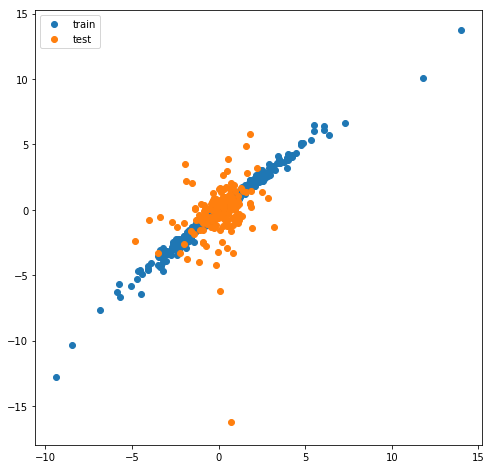

In [368]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import r2_score
from keras.layers import Dropout

# Create the model
model_1 = Sequential()
model_1.add(Dense(600, input_dim=train_features_scaled.shape[1], activation='relu'))
model_1.add(Dense(500, activation='relu'))
model_1.add(Dense(400, activation='relu'))
model_1.add(Dense(300, activation='relu'))
model_1.add(Dense(200, activation='relu'))
model_1.add(Dense(100, activation='relu'))
model_1.add(Dense(1, activation='linear'))

# Fit the model
model_1.compile(optimizer='adam', loss='mse')
history = model_1.fit(train_features_scaled, train_targets, epochs=25)

train_pred=model_1.predict(train_features_scaled)
test_pred=model_1.predict(test_features_scaled)

print(r2_score(train_pred,train_targets))
print(r2_score(test_pred,test_targets))

fig,ax=plt.subplots(figsize=(8,8))
plt.scatter(train_pred, train_targets,label='train')
plt.scatter(test_pred, test_targets,label='test')
plt.legend()
plt.show()

# Stock analysis 

In [372]:
path='Quantiacs_Data/Stock_Data/Finance_Stock_data/'
data_df_dict={}
for filename in glob.glob(os.path.join(path,'*.txt')):
    # Reading data
    data=pd.read_csv(filename,sep="\s*,\s*",index_col='DATE',engine='python')
    
    # Reading ticker from file name
    ticker=Path(filename).stem
    
    # Converting dates to datetime index
    data.index=pd.to_datetime(data.index,format='%Y%m%d')
    
    # Storing time series in the dict for ticerks
    data_df_dict[ticker]=data['CLOSE']

# Converting dict to a dataframe
data_df=pd.DataFrame(data_df_dict)

# Getting rid of columns which are Null all the way 
for i in data_df.columns:
    if len(data_df[i].dropna())==0:
        del data_df[i]
    else:
        continue
        
print(data_df.head(5))        
data_df.to_csv('Finance_Stocks.csv')

                ADP  ADS    AFL      AIG    AIV  AIZ    ALL  AMG  AMP  AMT  \
DATE                                                                         
2001-01-02  53.2064  NaN  17.41  1937.50  49.56  NaN  41.13  NaN  NaN  NaN   
2001-01-03  52.0747  NaN  16.97  1918.75  49.81  NaN  40.75  NaN  NaN  NaN   
2001-01-04  48.5920  NaN  16.28  1780.00  49.75  NaN  37.94  NaN  NaN  NaN   
2001-01-05  47.0392  NaN  16.10  1757.50  47.81  NaN  38.00  NaN  NaN  NaN   
2001-01-08  50.4693  NaN  16.10  1768.75  47.63  NaN  39.69  NaN  NaN  NaN   

            ...    TSS    UNM    USB   V    VNO   VTR    WFC  WU     WY  \
DATE        ...                                                           
2001-01-02  ...  21.88  25.38  23.06 NaN  30.46  5.88  26.97 NaN  20.52   
2001-01-03  ...  22.31  26.19  24.69 NaN  30.56  6.63  26.53 NaN  21.03   
2001-01-04  ...  24.13  24.44  25.63 NaN  30.46  6.31  26.00 NaN  21.67   
2001-01-05  ...  23.44  24.06  24.56 NaN  30.15  6.50  26.19 NaN  21.62   
200